In [46]:
import pandas as pd
hotels = pd.read_csv("hotel_booking_data.csv")
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## 作業 
## 請問支付最高平均每日房價（ADR）的人的名字是什麼？他們的ADR是多少？

In [47]:
myData = hotels.sort_values("adr",ascending=False)[["adr","name"]]
myData.head(5)

,adr,name
48515,5400.0,Daniel Walter
111403,510.0,Jesus Mason
15083,508.0,Samuel Hammond
103912,451.5,Jessica Morris
13142,450.0,Amy Banks


## 整個資料集中平均每次住宿的夜數是多少？可以將結果四捨五入到小數點後兩位

In [48]:
hotels["total_stay_days"] = hotels["stays_in_weekend_nights"] + hotels["stays_in_week_nights"]
hotels.head()
print(round(hotels["total_stay_days"].mean(),2))

3.43


In [49]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stay_days
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


## 「有哪些人提出了5次「特別請求」？他們的姓名和電子郵件地址是什麼？」

In [50]:
hotels[hotels["total_of_special_requests"] == 5][["name","email"]].head()

,name,email
7860,Amanda Harper,Amanda.H66@yahoo.com
11125,Laura Sanders,Sanders_Laura@hotmail.com
14596,Tommy Ortiz,Tommy_O@hotmail.com
14921,Gilbert Miller,Miller.Gilbert@aol.com
14922,Timothy Torres,TTorres@protonmail.com


## 資料集中的平均住宿總費用是多少？

In [51]:
hotels["total_paid"] = hotels["adr"] * hotels["total_stay_days"]

In [52]:
print(round(hotels["total_paid"].mean(),2))

357.85


## 有多少百分比的酒店住宿被分類為「回頭客」？（不要根據人的姓名，而是根據is_repeated_guest欄位）

In [53]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'total_stay_days', 'total_paid'],
      dtype='object')

In [54]:
ans = sum(hotels["is_repeated_guest"] == 1) / len(hotels)
ans =ans * 100
round(ans,2) 

3.19

**資料集中最常見的前五個姓氏是什麼？**

In [55]:
"Amanda Harper".split()[1]

'Harper'

In [62]:
hotels["name"].apply(lambda name:name.split()[1]).value_counts()[:5]

name
Smith       2510
Johnson     1998
Williams    1628
Jones       1441
Brown       1433
Name: count, dtype: int64

## 有哪些人為他們的住宿預訂了最多的兒童和嬰兒？

In [60]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'total_stay_days', 'total_paid'],
      dtype='object')

In [64]:
hotels["total_kids"] = hotels["children"] + hotels["babies"]
hotels.sort_values("total_kids",ascending=False).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stay_days,total_paid,total_kids
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,1,No-Show,2015-07-12,Jamie Ramirez,Ramirez_Jamie22@aol.com,268-823-5667,************7600,14,1864.24,10.0
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,1,Check-Out,2016-01-14,Nicholas Parker,Parker.Nicholas57@hotmail.com,440-692-0519,************4291,2,168.90,10.0
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,0,Check-Out,2015-10-14,Marc Robinson,Robinson_Marc@protonmail.com,934-726-2629,************1933,3,285.00,9.0
19718,Resort Hotel,0,0,2016,January,1,1,0,1,2,...,0,Check-Out,2016-01-02,Mr. Jeffrey Cross,Mr..Cross@yandex.com,822-960-5931,************6777,1,124.00,3.0
107837,City Hotel,0,13,2017,March,11,18,0,1,2,...,2,Check-Out,2017-03-19,Albert French,French.Albert@mail.com,953-281-5231,************9947,1,152.00,3.0


## 要找出電話號碼中最常見的前三個區號（區號是前三個數字）

In [ ]:
hotels["phone-number"].head()

0    669-792-1661
1    858-637-6955
2    652-885-2745
3    364-656-8427
4    713-226-5883
Name: phone-number, dtype: object

In [67]:
hotels["phone-number"].apply(lambda num:num[:3]).value_counts()[:3]

phone-number
799    168
185    167
541    166
Name: count, dtype: int64

## 有多少次check-in是在每個月的1日至15日之間發生的（包括1日和15日）？

In [68]:
hotels["arrival_date_day_of_month"].apply(lambda day:day in range(1,16)).sum()

58152

# Scatter Plots

In [69]:
import pandas as pd
import seaborn as sns

In [70]:
df = pd.read_csv("dm_office_sales.csv")
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='salary', ylabel='sales'>

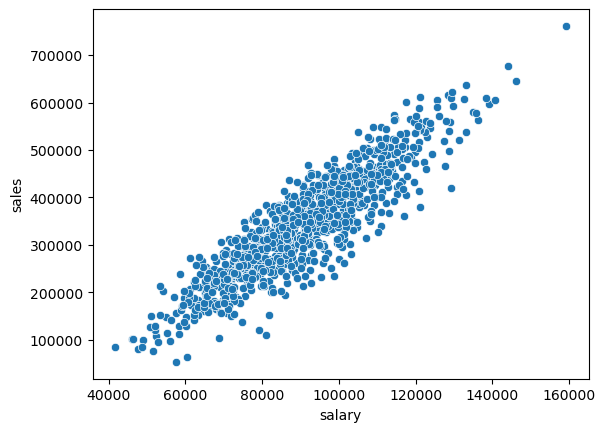

In [71]:
sns.scatterplot(x="salary",y="sales",data=df)

<Axes: xlabel='salary', ylabel='sales'>

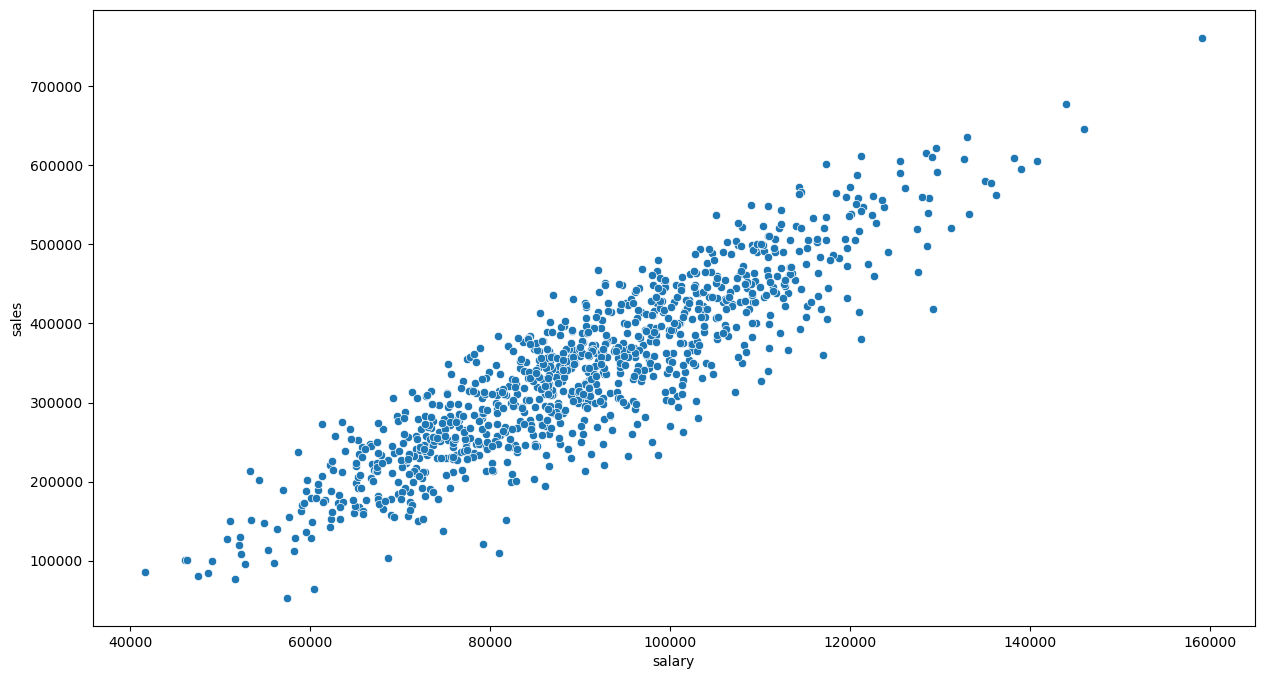

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.scatterplot(x="salary",y="sales",data=df)

## Seaborn Parameters

The hue and palette parameters are commonly available around many plot calls in seaborn.

### hue

Color points based off a categorical feature in the DataFrame

在Python的`seaborn`圖表庫中使用`scatterplot`函數繪製散點圖時，`hue`參數用來表示顏色。當設定`hue='division'`時，意味著散點圖上的點將根據`division`這一欄位的值來分配顏色，不同的`division`值會使用不同的顏色表示。這樣做可以幫助觀察者更清楚地看到不同部門(`division`)在薪水(`salary`)和銷售(`sales`)之間的關係差異。

<Axes: xlabel='salary', ylabel='sales'>

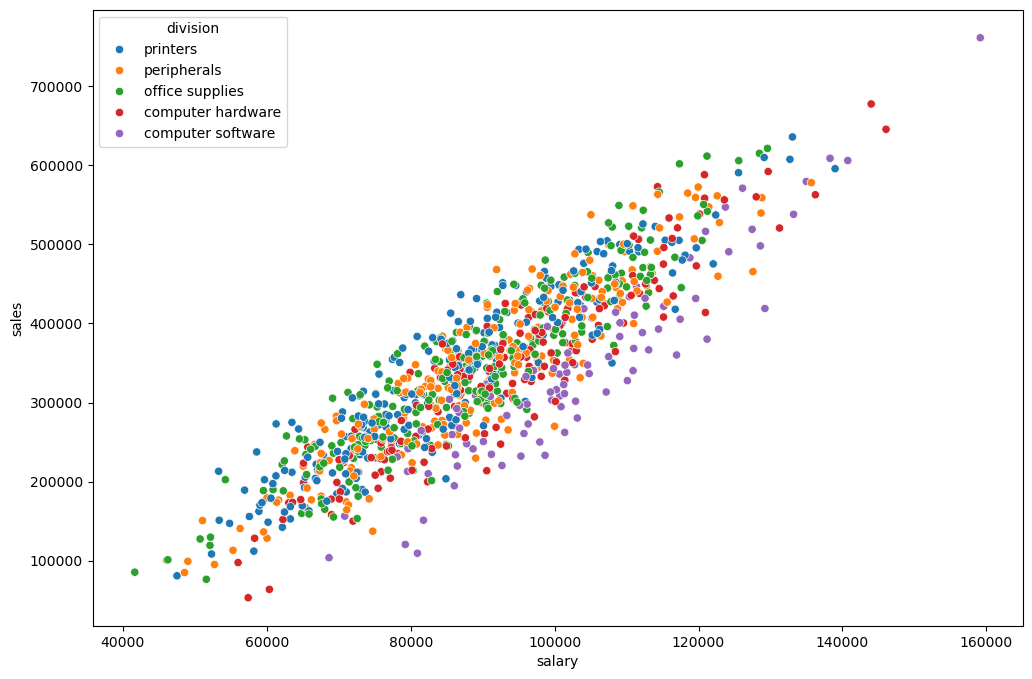

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="division")

In [75]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='salary', ylabel='sales'>

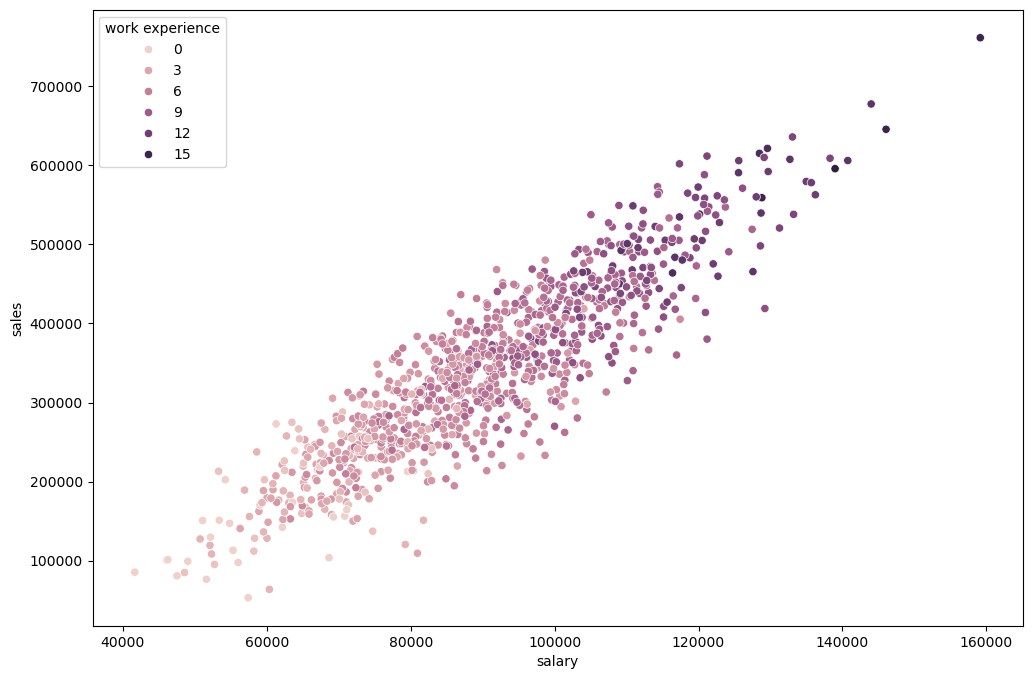

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience")

https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='salary', ylabel='sales'>

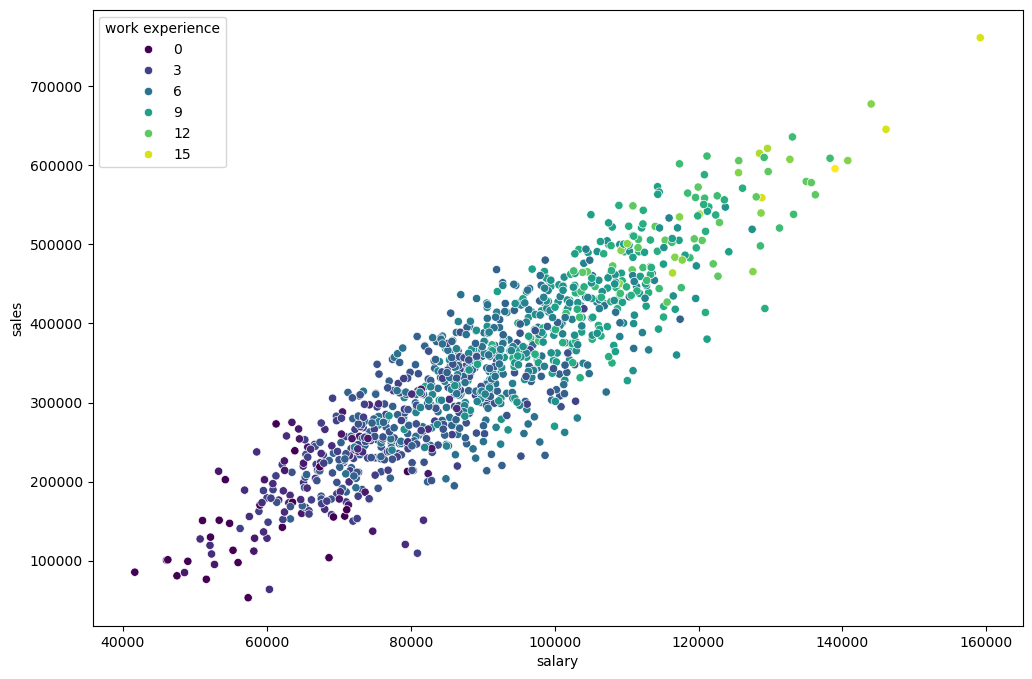

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",palette="viridis")

<Axes: xlabel='salary', ylabel='sales'>

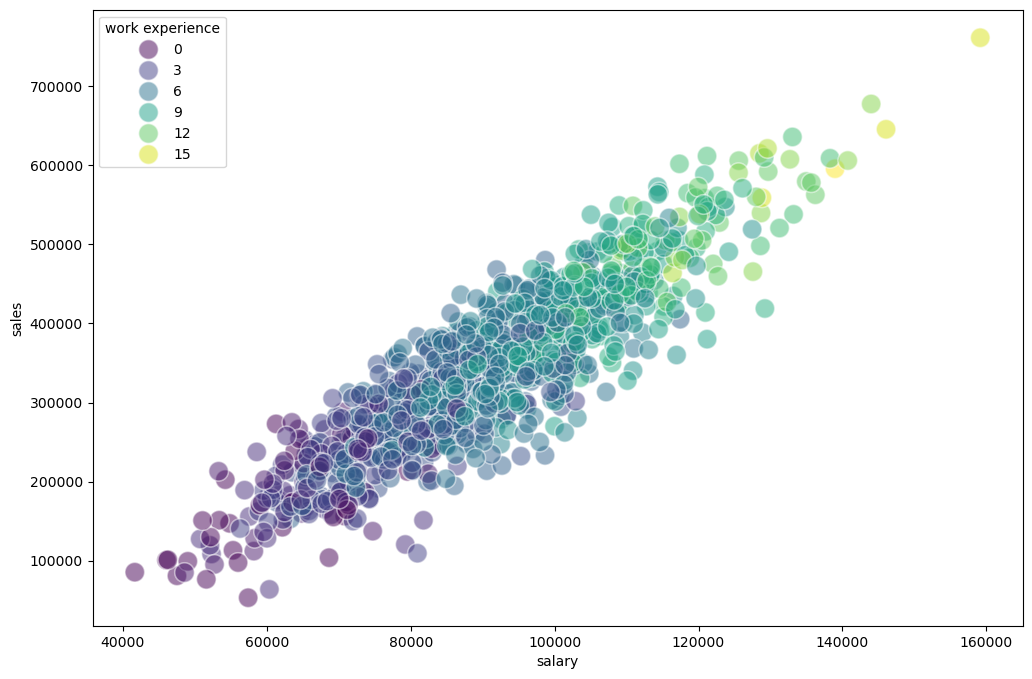

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",palette="viridis",s = 200,alpha=0.5)

In [90]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='salary', ylabel='sales'>

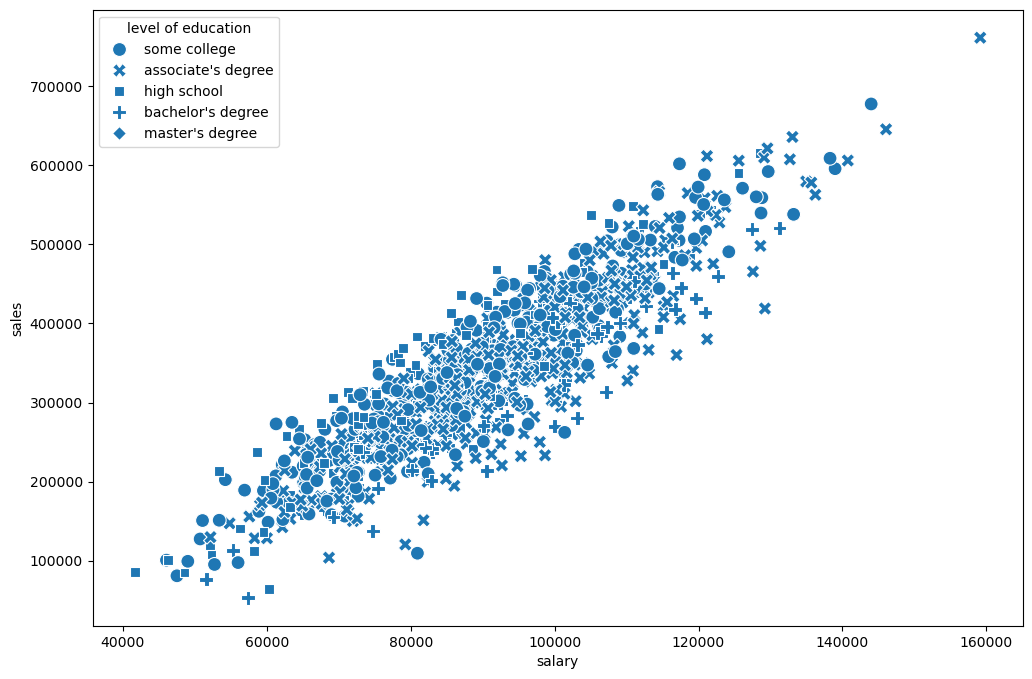

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,s=100,style="level of education")

<Axes: xlabel='salary', ylabel='sales'>

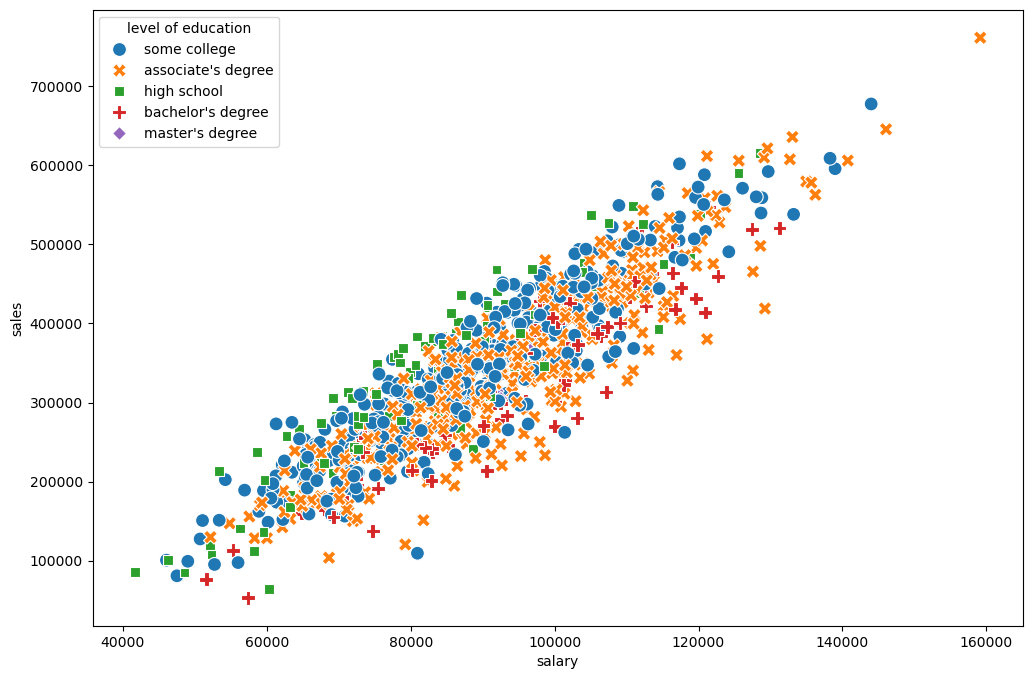

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,s=100,style="level of education",hue="level of education")

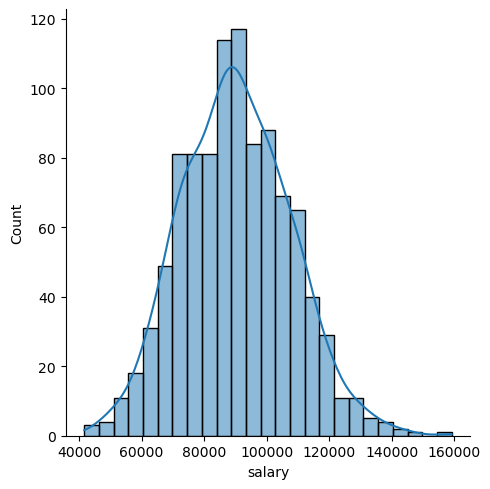

In [99]:
sns.displot(data=df,x="salary",kde=True)

<Axes: xlabel='salary', ylabel='Count'>

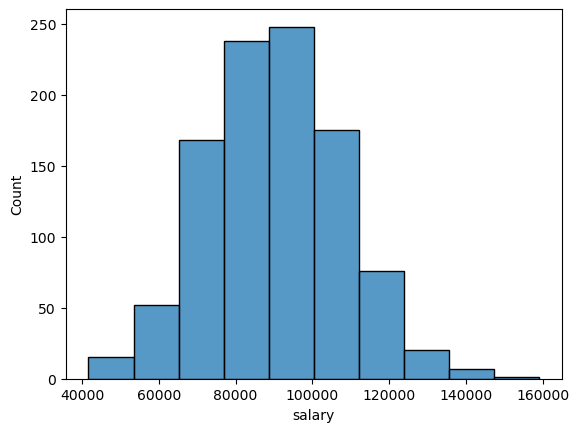

In [101]:
sns.histplot(data=df,x="salary",bins=10)

https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='salary', ylabel='Count'>

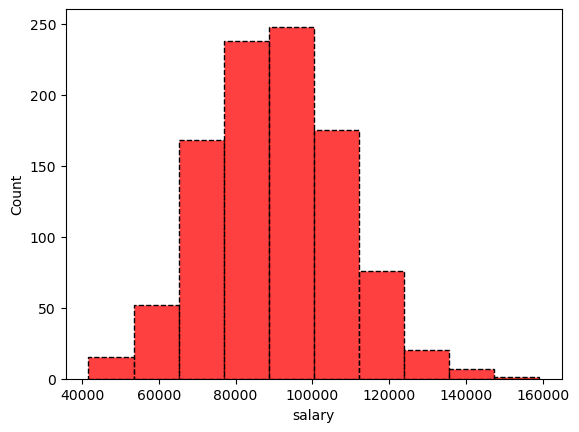

In [102]:
sns.histplot(data=df,x="salary",bins=10,color="red",ls="--")

In [103]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='division', ylabel='count'>

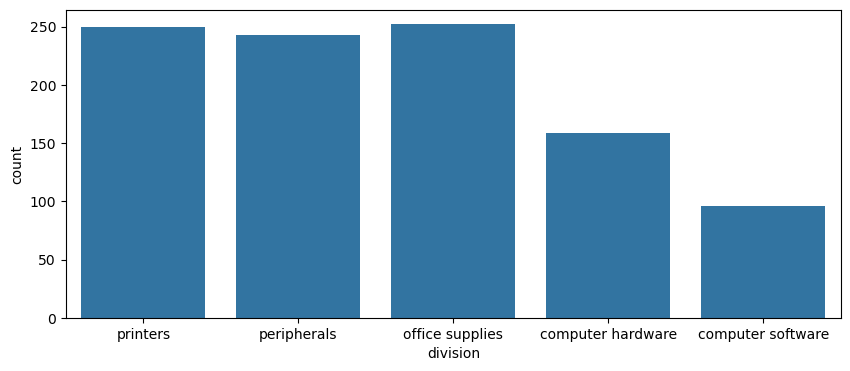

In [104]:
plt.figure(figsize=(10,4))
sns.countplot(x="division",data=df)

<Axes: xlabel='level of education', ylabel='count'>

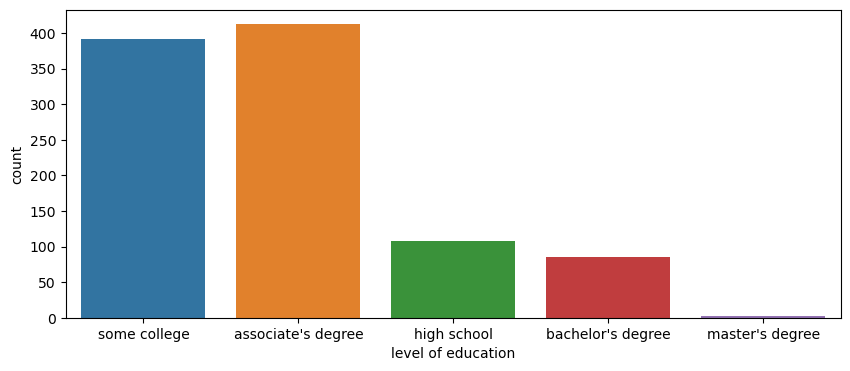

In [106]:
plt.figure(figsize=(10,4))
sns.countplot(x="level of education",data=df,hue="level of education")

<Axes: xlabel='level of education', ylabel='count'>

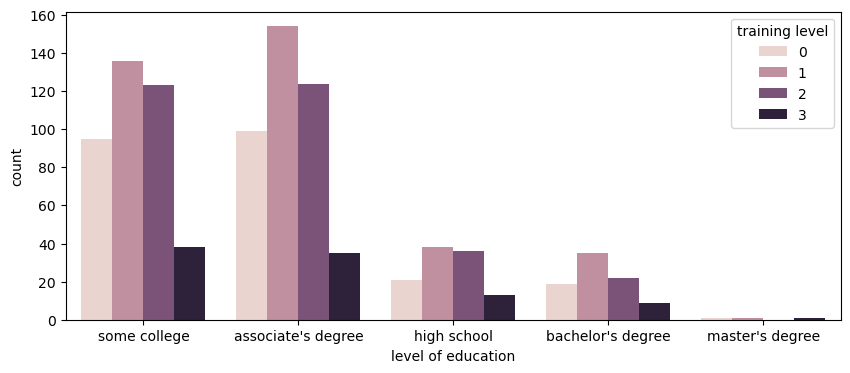

In [107]:
plt.figure(figsize=(10,4))
sns.countplot(x="level of education",data=df,hue="training level")

<Axes: xlabel='level of education', ylabel='count'>

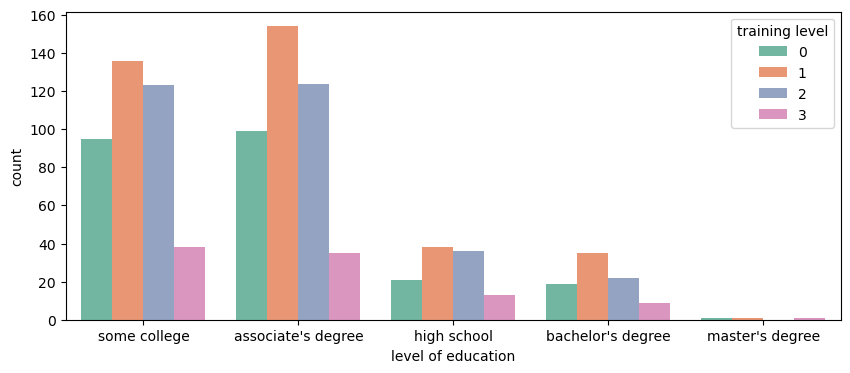

In [109]:
plt.figure(figsize=(10,4))
sns.countplot(x="level of education",data=df,hue="training level",palette="Set2")